In [68]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [69]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [70]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [71]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
#cities

621

In [72]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [73]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [74]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4bc7edf24479d9c2291ee6e8ab46f85e


In [75]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | karratha
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | nelson bay
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | celestun
Processing Record 8 of Set 1 | mahibadhoo
Processing Record 9 of Set 1 | laguna
Processing Record 10 of Set 1 | manzini
Processing Record 11 of Set 1 | grenville
Processing Record 12 of Set 1 | mao
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | fortuna
Processing Record 16 of Set 1 | pangnirtung
Processing Record 17 of Set 1 | tecoanapa
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | geraldton
Processing Record 20 of Set 1 | samusu
City not found. Skipping...
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of S

Processing Record 40 of Set 4 | alta floresta
Processing Record 41 of Set 4 | carnarvon
Processing Record 42 of Set 4 | fort morgan
Processing Record 43 of Set 4 | torbay
Processing Record 44 of Set 4 | kununurra
Processing Record 45 of Set 4 | ostrovnoy
Processing Record 46 of Set 4 | cidreira
Processing Record 47 of Set 4 | mergui
City not found. Skipping...
Processing Record 48 of Set 4 | luneville
Processing Record 49 of Set 4 | kurchum
Processing Record 50 of Set 4 | caraquet
Processing Record 1 of Set 5 | cherskiy
Processing Record 2 of Set 5 | darhan
Processing Record 3 of Set 5 | skibbereen
Processing Record 4 of Set 5 | husavik
Processing Record 5 of Set 5 | katsuura
Processing Record 6 of Set 5 | dakar
Processing Record 7 of Set 5 | haines junction
Processing Record 8 of Set 5 | marang
Processing Record 9 of Set 5 | kingisepp
Processing Record 10 of Set 5 | auki
Processing Record 11 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 12 of Set 5 | tasiilaq
Proce

Processing Record 27 of Set 8 | san cristobal
Processing Record 28 of Set 8 | marawi
Processing Record 29 of Set 8 | nanortalik
Processing Record 30 of Set 8 | marsabit
Processing Record 31 of Set 8 | lipin bor
Processing Record 32 of Set 8 | sao filipe
Processing Record 33 of Set 8 | mount gambier
Processing Record 34 of Set 8 | pivijay
Processing Record 35 of Set 8 | sechura
Processing Record 36 of Set 8 | kayerkan
Processing Record 37 of Set 8 | paso de los toros
Processing Record 38 of Set 8 | price
Processing Record 39 of Set 8 | tres arroyos
Processing Record 40 of Set 8 | dolzhanskaya
Processing Record 41 of Set 8 | salta
Processing Record 42 of Set 8 | touros
Processing Record 43 of Set 8 | benoy
Processing Record 44 of Set 8 | kadyy
Processing Record 45 of Set 8 | candelaria
Processing Record 46 of Set 8 | saldanha
Processing Record 47 of Set 8 | aloleng
Processing Record 48 of Set 8 | duncan
Processing Record 49 of Set 8 | buenos aires
Processing Record 50 of Set 8 | rodrigue

Processing Record 17 of Set 12 | snezhnogorsk
Processing Record 18 of Set 12 | hami
Processing Record 19 of Set 12 | sao gabriel da cachoeira
Processing Record 20 of Set 12 | hervey bay
Processing Record 21 of Set 12 | liberty
Processing Record 22 of Set 12 | solovetskiy
City not found. Skipping...
Processing Record 23 of Set 12 | vikhorevka
Processing Record 24 of Set 12 | guanica
Processing Record 25 of Set 12 | kodar
Processing Record 26 of Set 12 | ambositra
Processing Record 27 of Set 12 | ilhabela
Processing Record 28 of Set 12 | mocuba
Processing Record 29 of Set 12 | balabac
Processing Record 30 of Set 12 | ilulissat
Processing Record 31 of Set 12 | reftinskiy
Processing Record 32 of Set 12 | bhuvanagiri
Processing Record 33 of Set 12 | gzhatsk
City not found. Skipping...
Processing Record 34 of Set 12 | bambous virieux
Processing Record 35 of Set 12 | rawson
Processing Record 36 of Set 12 | santa fe
Processing Record 37 of Set 12 | maniitsoq
Processing Record 38 of Set 12 | fo

In [76]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.6167,-73.6500,57.34,60,0,16.89,CL,2022-04-03 18:39:55
1,Mar Del Plata,-38.0023,-57.5575,75.22,60,40,19.57,AR,2022-04-03 18:38:17
2,Karratha,-20.7377,116.8463,81.16,71,0,10.74,AU,2022-04-03 18:39:56
3,Nelson Bay,-32.7167,152.1500,63.00,90,97,6.06,AU,2022-04-03 18:39:56
4,Dikson,73.5069,80.5464,-2.52,99,63,9.40,RU,2022-04-03 18:39:56
5,Celestun,20.8667,-90.4000,84.51,64,29,14.14,MX,2022-04-03 18:37:58
6,Mahibadhoo,3.7833,72.9667,82.80,68,20,1.97,MV,2022-04-03 18:39:57
7,Laguna,38.4210,-121.4238,77.02,28,0,8.05,US,2022-04-03 18:39:57
8,Manzini,-26.2500,31.5000,72.72,92,100,1.48,SZ,2022-04-03 18:39:57
9,Grenville,12.1167,-61.6167,84.25,65,9,15.59,GD,2022-04-03 18:39:58


In [77]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lebu,CL,2022-04-03 18:39:55,-37.6167,-73.6500,57.34,60,0,16.89
1,Mar Del Plata,AR,2022-04-03 18:38:17,-38.0023,-57.5575,75.22,60,40,19.57
2,Karratha,AU,2022-04-03 18:39:56,-20.7377,116.8463,81.16,71,0,10.74
3,Nelson Bay,AU,2022-04-03 18:39:56,-32.7167,152.1500,63.00,90,97,6.06
4,Dikson,RU,2022-04-03 18:39:56,73.5069,80.5464,-2.52,99,63,9.40
...,...,...,...,...,...,...,...,...,...
561,Beira,MZ,2022-04-03 18:54:31,-19.8436,34.8389,80.69,83,20,11.99
562,Lesozavodsk,RU,2022-04-03 18:54:31,45.4794,133.4244,41.13,51,0,13.94
563,Nyagan,RU,2022-04-03 18:54:31,62.1406,65.3936,29.19,94,100,13.47
564,Pochutla,MX,2022-04-03 18:54:32,15.7432,-96.4661,89.82,33,5,8.95


In [96]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lebu,CL,2022-04-03 18:39:55,-37.6167,-73.6500,57.34,60,0,16.89
1,Mar Del Plata,AR,2022-04-03 18:38:17,-38.0023,-57.5575,75.22,60,40,19.57
2,Karratha,AU,2022-04-03 18:39:56,-20.7377,116.8463,81.16,71,0,10.74
3,Nelson Bay,AU,2022-04-03 18:39:56,-32.7167,152.1500,63.00,90,97,6.06
4,Dikson,RU,2022-04-03 18:39:56,73.5069,80.5464,-2.52,99,63,9.40
...,...,...,...,...,...,...,...,...,...
561,Beira,MZ,2022-04-03 18:54:31,-19.8436,34.8389,80.69,83,20,11.99
562,Lesozavodsk,RU,2022-04-03 18:54:31,45.4794,133.4244,41.13,51,0,13.94
563,Nyagan,RU,2022-04-03 18:54:31,62.1406,65.3936,29.19,94,100,13.47
564,Pochutla,MX,2022-04-03 18:54:32,15.7432,-96.4661,89.82,33,5,8.95


In [109]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [107]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1649012392.4084933

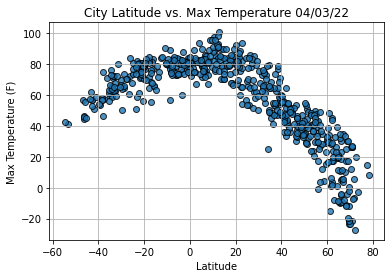

In [81]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

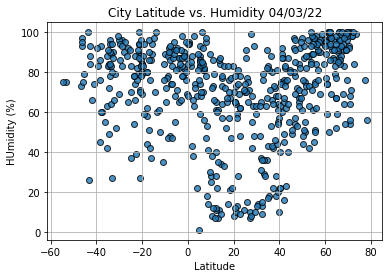

In [82]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("HUmidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

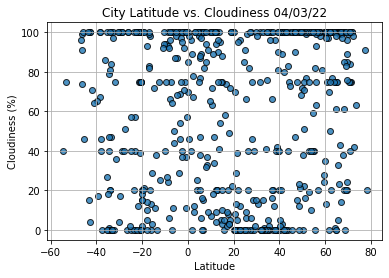

In [83]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

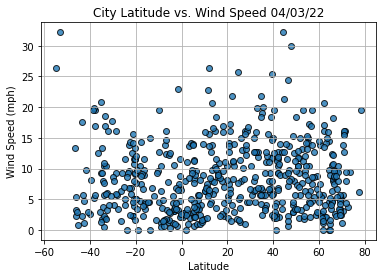

In [84]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

NameError: name 'title' is not defined

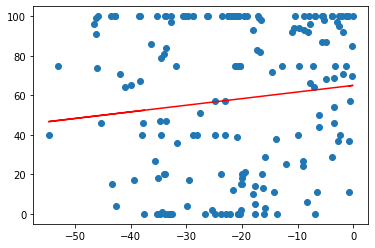

In [110]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [111]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [86]:
index13 = city_data_df.loc[13]
index13

City                      Fortuna
Country                        US
Date          2022-04-03 18:39:58
Lat                       40.5982
Lng                     -124.1573
Max Temp                    55.92
Humidity                       75
Cloudiness                     20
Wind Speed                   1.99
Name: 13, dtype: object

In [112]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4       True
       ...  
561    False
562     True
563     True
564     True
565    False
Name: Lat, Length: 566, dtype: bool

In [113]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Dikson,RU,2022-04-03 18:39:56,73.5069,80.5464,-2.52,99,63,9.40
5,Celestun,MX,2022-04-03 18:37:58,20.8667,-90.4000,84.51,64,29,14.14
6,Mahibadhoo,MV,2022-04-03 18:39:57,3.7833,72.9667,82.80,68,20,1.97
7,Laguna,US,2022-04-03 18:39:57,38.4210,-121.4238,77.02,28,0,8.05
9,Grenville,GD,2022-04-03 18:39:58,12.1167,-61.6167,84.25,65,9,15.59
...,...,...,...,...,...,...,...,...,...
559,Sorland,NO,2022-04-03 18:54:30,67.6670,12.6934,33.66,69,38,8.75
560,Leshukonskoye,RU,2022-04-03 18:54:30,64.8989,45.7622,20.01,94,98,5.12
562,Lesozavodsk,RU,2022-04-03 18:54:31,45.4794,133.4244,41.13,51,0,13.94
563,Nyagan,RU,2022-04-03 18:54:31,62.1406,65.3936,29.19,94,100,13.47


In [114]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

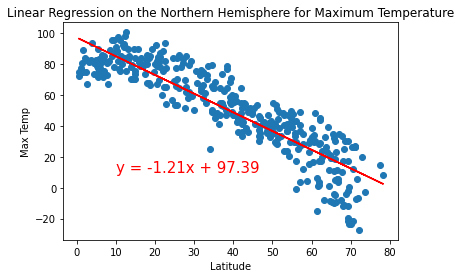

In [115]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,10))

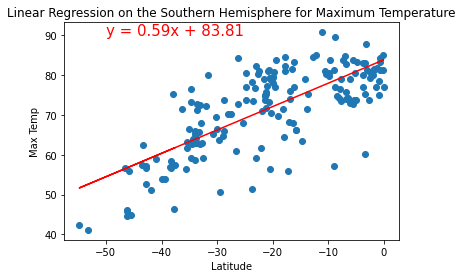

In [116]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

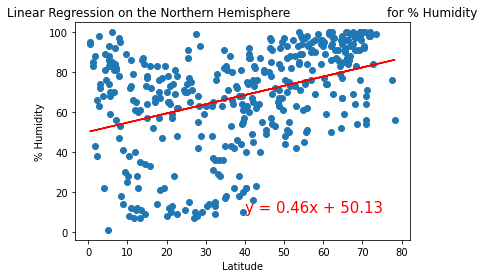

In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

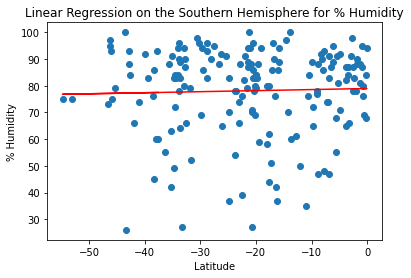

In [93]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

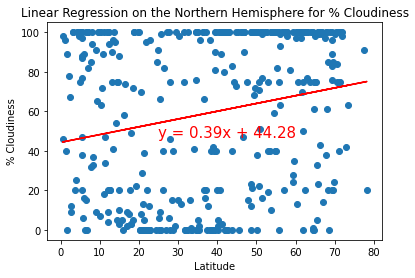

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(25,47))

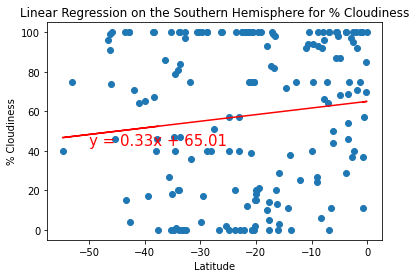

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,43))